# **IMAGE ANALYSIS**
## **Practice 3.** Image Algebra.

#### Created by: Bryan Israel Blancas Pérez.

##### ID: 2016630031

##### Group: 3CV7

# **Image Algebra.**

Image algebra refers to make operations between two image, represented as a matrix, in order to create a new image or modified the current image. To be accurate, that operations consist in determine the new value of a pixel P[i,j] from pixels P'[i,j] and P''[i,j], where P' and P'' are two images.

Due to, in fact, image algebra is operations between matrices, there are some considerations I have to say for this practice.

Considerations for this practice:
<ul>
    <li>The pair of images must be the same size</li>
    <li>The operations are between two grayscale image or two binary image</li>
</ul>

## Basic image algebra operations for grayscale images.

### Addition 

The operation addition is defined as follows:

    Be A and B two images given, and C the result image:

<img src="theoryImages/addMatrix.png" alt="header" style="height:70px;">

    Where each pixel is defined as:

<img src="theoryImages/addPixelMatrix.png" alt="header" style="height:70px;">

In other words, add two images is to merge two values of pixels into one. If the result value is larger than 255, we have to set the value to 255, because that is the maximun value of a pixel in an image.
Addition can be used to put two images together and make some kind of montage.

Example with the algorithm made for this practice:

<img src="theoryImages/originalImagesGray.png" alt="header" style="width:700px;">
<img src="theoryImages/addition.png" alt="header" style="width:500px;">

In the box bellow, I show the addition algorithm that I made for this practice.

In [1]:
# Load cython
%load_ext Cython

In [2]:
%%cython -a
cimport numpy as cnp
import numpy as np

#
# Algorithm to calculate the addition between two grayscale images
#

def add(cnp.ndarray[cnp.npy_uint8, ndim=2] image1_gs, cnp.ndarray[cnp.npy_uint8, ndim=2] image2_gs):

    # Images size are equal, so it doesn't matter where the size is taken from 
    cdef int height = image1_gs.shape[0]
    cdef int width = image1_gs.shape[1]

    # Initializing result image
    cdef cnp.ndarray add_images = np.zeros((height,width), dtype = np.uint8)

    cdef int i = 0
    cdef int j = 0
    cdef float add = 0.0
    
    # Traversing both images 
    for i in range(height):
        for j in range(width):
            
            # Calculating new value
            add = float(image1_gs[i,j]) + float(image2_gs[i,j])
            
            # Bounding new value
            if(add > 255.0):
                add = 255.0

            # Setting new value 
            add_images[i,j] = int(add)

    # Return new image
    return add_images

### Subtraction 

The operation subtraction is defined as follows:

    Be A and B two images given, and C the result image:

<img src="theoryImages/subMatrix.png" alt="header" style="height:70px;">

    Where each pixel is defined as:

<img src="theoryImages/subPixelMatrix.png" alt="header" style="height:70px;">


In other words, subtract two images is give a new value to a pixel in order to see the differences between two pixels. If the result value is less than 0, we have to set the value to 0, because that is the minimum value of a pixel in an image.
Subtraction can be used to see the differences between two images in the same field, or to detect movement.

Example with the algorithm made for this practice:

<img src="theoryImages/originalImagesGray.png" alt="header" style="width:700px;">
<img src="theoryImages/sustraction.png" alt="header" style="width:500px;">

In the box bellow, I show the addition algorithm that I made for this practice.

In [3]:
%%cython -a
cimport numpy as cnp
import numpy as np

#
# Algorithm to calculate the subtraction between two grayscale images
#

def sub(cnp.ndarray[cnp.npy_uint8, ndim=2] image1_gs, cnp.ndarray[cnp.npy_uint8, ndim=2] image2_gs):

    # Images size are equal, so it doesn't matter where the size is taken from 
    cdef int height = image1_gs.shape[0]
    cdef int width = image1_gs.shape[1]

    # Initializing the result image
    cdef cnp.ndarray sub_images = np.zeros((height,width), dtype = np.uint8)

    cdef int i = 0
    cdef int j = 0
    cdef float sub = 0.0
    
    # Traversing both images 
    for i in range(height):
        for j in range(width):
            
            # Calculating new value
            sub = float(image1_gs[i,j]) - float(image2_gs[i,j])
            
            # Bounding new value
            if(sub < 0.0):
                sub = 0.0

            # Setting new value
            sub_images[i,j] = int(sub)

    # Return new image
    return sub_images

### Multiplication by scalar 

The operation multiplication by scalar is defined as follows:

    Be A an image given, C the result image and x a scalar:

<img src="theoryImages/mulMatrix.png" alt="header" style="height:70px;">

    Where each pixel is defined as:

<img src="theoryImages/mulPixelMatrix.png" alt="header" style="height:70px;">


In other words, multiply an image with a scalar means to increase (x => 1) or decrease ( 0 < x < 1) the current value of the pixel. If the result value is larger than 255, we have to set the value to 255, because that is the maximum value of a pixel in an image.
Multiplication can be used to increase or decrease the brightness of an image.

Example with the algorithm made for this practice:

<img src="theoryImages/originalGray.png" alt="header" style="width:500px;">
<img src="theoryImages/mul.png" alt="header" style="width:500px;">

In the box bellow, I show the addition algorithm that I made for this practice.

In [4]:
%%cython -a
cimport numpy as cnp
import numpy as np

#
# Algorithm to calculate the multiplicatiion between an image and a scalar
#

def mulByScalar(cnp.ndarray[cnp.npy_uint8, ndim=2] image_gs, float scalar):

    # Getting values from image
    cdef int height = image_gs.shape[0]
    cdef int width = image_gs.shape[1]

    # Initializing result image
    cdef cnp.ndarray mul_image = np.zeros((height,width), dtype = np.uint8)

    cdef int i = 0
    cdef int j = 0
    cdef float mul = 0.0
    
    #Traversing the image
    for i in range(height):
        for j in range(width):
            
            # Calculating new value
            mul = float(image_gs[i,j]) * scalar
            
            # Bounding new value 
            if(mul < 0.0):
                mul = 0.0
            elif(mul > 255.0):
                mul = 255.0

            # Setting new value
            mul_image[i,j] = int(mul)

    # Return new image
    return mul_image

### Convolution

Convolution is used to operate an image 'f' with another image 'g' called 'convolution mask', whose size is less than the size of the image f.

Convolution mask has previously established values that we already know what effects will produce in the image f. Those effects are like filters and with those we can find borders in an image, focus an image or even improve the quality.

Mathematically, convolution in image algebra is defined as follows:

    Be f an image and g the convolution mask

<img src="theoryImages/convMatrix.png" alt="header" style="width:500px;">

The image bellow, can be useful to understand the proccess of convolution. As we can see, we have the image and we will pass through it the convolution mask, give us each time a new value for the pixel.

<img src="theoryImages/convProcess.png" alt="header" style="width:600px;height:350px">

At the end of the process, when the convolution mask has passed through the entire image, we will have a new image with new values that made a visible change to the image.

<img src="theoryImages/convProcessFinished.png" alt="header" style="width:600px">

For example, in the next two images you can see the original image firstly and the image with Sobel filter to detect borders after, made with the algorithm developed for this practice.

<img src="theoryImages/originalImage.png" alt="header" style="width:500px">
<img src="theoryImages/alteredImage.png" alt="header" style="width:500px">

There are some clarifications about this algorithm developed:
<ol>
    <li>In orden to be able to do the convolution even in the bordes of the image, in this practice I completed the values around the edge with zeros to be able of put the convolution mask in the border</li>
    <li>Due to the new value of the pixel can be larger than 255 or less than 0, I have done I have made an adjustment for those values that leave the valid range</li>
    <li>To avoid lost of information, I applied an absolut value function to past every negative value to positive</li>
</ol>

In the box bellow, I show the addition algorithm that I made for this practice.

In [5]:
%%cython -a
cimport numpy as cnp
import numpy as np

#
# Algorithm to calculate the convolution of an image
#

def convolution(cnp.ndarray[cnp.npy_uint8, ndim=2] image_gs, cnp.ndarray[cnp.npy_float32, ndim=2] mask, cnp.ndarray[cnp.npy_uint8, ndim=1] start):
    
    # Getting data from convolution mask
    cdef char index_start_height = start[0]
    cdef char index_start_width = start[1] 

    cdef char height_mask = mask.shape[0]
    cdef char width_mask = mask.shape[1]

    # Getting data from image
    cdef int height_image = image_gs.shape[0]
    cdef int width_image = image_gs.shape[1]

    
    #
    # Completing image array to avoid problems in convolution
    #

    # Calculating how much pixels will be added to the array
    cdef char leftover_y = height_mask - 1
    cdef char leftover_x = width_mask - 1

    #print("leftover_y: "+str(leftover_y))
    #print("leftover_x: "+str(leftover_x))

    # Calculating new size of the image, with more pixel in order of 
    # make the convolution with all the pixels
    cdef int new_height = height_image + 2*leftover_y
    cdef int new_width = width_image + 2*leftover_x

    #print("new_height: "+str(new_height))
    #print("new_width: "+str(new_width))
    
    # Initializing modified image and result image
    cdef cnp.ndarray convolution = np.zeros((new_height,new_width), dtype = np.uint8)
    cdef cnp.ndarray convolution2 = image_gs.copy()

    cdef int i = 0
    cdef int j = 0
    
    # Copy data from original image to modified image in the right place
    for i in range(leftover_y, height_image + leftover_y):
        for j in range(leftover_x, width_image + leftover_x):
            convolution[i,j] = image_gs[i-leftover_y, j-leftover_x]


    # 
    # Convolution process algorithm as well
    #
    
    cdef int i_mask = 0
    cdef int j_mask = 0
    cdef float conv_value = 0.0
    cdef int sub_value_y = 0
    cdef int sub_value_x = 0
    
    # Traversing the image
    for i in range(leftover_y, height_image + leftover_y):
        for j in range(leftover_x, width_image + leftover_x):
            
            # Initialazing new value for this pixel
            conv_value = 0.0
            
            # Traversing convolution mask
            for i_mask in range(height_mask):
                for j_mask in range(width_mask):
                
                    # If the current value of the pixel in the mask is different of zero
                    # It makes sense to calculate the value to add it to the final result
                    if(mask[i_mask, j_mask] != 0):
                        sub_value_y = i_mask - index_start_height
                        sub_value_x = j_mask - index_start_width
                        conv_value += float(mask[i_mask, j_mask]) * float(convolution[i -  sub_value_y, j - sub_value_x])
            
            # Due to conv_value can be negative, I calculate the absolut value to avoid lossing information
            conv_value = abs(conv_value)
            
            # Bounding the new value
            if(conv_value > 255.0):
                conv_value = 255.0
            elif(conv_value < 0):
                conv_value = 0.0

            # Setting the new value
            convolution2[i-leftover_y,j-leftover_x] = int(conv_value)

    # Return new image
    return convolution2

## Basic image algebra operations for binary images.

### Union

The operation union is the analogous of addition. This is due to in binary image we are suppose to have only 0's and 1's in the pixels, so instead of 'plus' I use the binary operator 'or'. The aim of the operation is the same that addition.

Example with the algorithm made for this practice:

<img src="theoryImages/originalImages.png" alt="header" style="width:700px;">
<img src="theoryImages/union.png" alt="header" style="width:500px;">

In the box bellow, I show the addition algorithm that I made for this practice.

In [6]:
%%cython -a
cimport numpy as cnp
import numpy as np

#
# Algorithm for calculate the union between two binary images
#

def union(cnp.ndarray[cnp.npy_uint8, ndim=2] image1_binary, cnp.ndarray[cnp.npy_uint8, ndim=2] image2_binary):
    
    # Images size are equal, so it doesn't matter where the size is taken from 
    cdef int height = image1_binary.shape[0]
    cdef int width = image1_binary.shape[1]

    # Initializing result image
    cdef cnp.ndarray union_images = np.zeros((height,width), dtype = np.uint8)
    
    cdef int i = 0
    cdef int j = 0
    
    #Traversing both images
    for i in range(height):
        for j in range(width):
            
            # Setting new value
            union_images[i,j] = image1_binary[i,j] | image2_binary[i,j]

    # Return new image
    return union_images

### Intersection

The operation intersection is the analogous of subtraction. This is due to in binary image we are suppose to have only 0's and 1's in the pixels, so instead of 'less' I use the binary operator 'and'. The aim of the operation is the same that intersection.

Example with the algorithm made for this practice:

<img src="theoryImages/originalImages.png" alt="header" style="width:700px;">
<img src="theoryImages/intersection.png" alt="header" style="width:500px;">

In the box bellow, I show the addition algorithm that I made for this practice.

In [7]:
%%cython -a
cimport numpy as cnp
import numpy as np

#
# Algorithm to calculate the intersection between two binary images 
#

def intersection(cnp.ndarray[cnp.npy_uint8, ndim=2] image1_binary, cnp.ndarray[cnp.npy_uint8, ndim=2] image2_binary):
    
    # Images size are equal, so it doesn't matter where the size is taken from 
    cdef int height = image1_binary.shape[0]
    cdef int width = image1_binary.shape[1]

    # Initializing result image
    cdef cnp.ndarray intersection_images = np.zeros((height,width), dtype = np.uint8)

    cdef int i = 0
    cdef int j = 0
    
    # Traversing both images
    for i in range(height):
        for j in range(width):
            
            # Setting new value
            intersection_images[i,j] = image1_binary[i,j] & image2_binary[i,j]

    # Return new image
    return intersection_images

### Complement

The operation complement is the analogous of multiplication. So where the image has 1 it will be changed to 0 and vice versa.

Example with the algorithm made for this practice:

<img src="theoryImages/originalBinary.png" alt="header" style="width:500px;">
<img src="theoryImages/complement.png" alt="header" style="width:500px;">

In the box bellow, I show the addition algorithm that I made for this practice.

In [8]:
%%cython -a
cimport numpy as cnp
import numpy as np

#
# Algorithm to calculate the complement of a binary image
#

def complement(cnp.ndarray[cnp.npy_uint8, ndim=2] image1_binary):
    
    # Images size are equal, so it doesn't matter where the size is taken from 
    cdef int height = image1_binary.shape[0]
    cdef int width = image1_binary.shape[1]

    # Initializing result image
    cdef cnp.ndarray complement_image = np.zeros((height,width), dtype = np.uint8)
    
    cdef int i = 0
    cdef int j = 0
    cdef unsigned char val = 0 
    
    # Traversing image
    for i in range(height):
        for j in range(width):
            
            # Getting current value
            val = image1_binary[i,j]
            
            # Calculating new value
            if(val > 127):
                val = 0
            elif(val <= 127):
                val = 255
                
            # Setting new value
            complement_image[i,j] = val
    
    # Return new image
    return complement_image

### Convolution 

This operation is the same for grayscale images and for binary images.

Example with the algorithm made for this practice:

<img src="theoryImages/originalBinary.png" alt="header" style="width:500px;">
<img src="theoryImages/convolution.png" alt="header" style="width:500px;">

In the box bellow, I show the addition algorithm that I made for this practice.

In [9]:
%%cython -a
cimport numpy as cnp
import numpy as np

#
# Algorithm to calculate convolution of an image
#

def binary_convolution(cnp.ndarray[cnp.npy_uint8, ndim=2] image_gs, cnp.ndarray[cnp.npy_float32, ndim=2] mask, cnp.ndarray[cnp.npy_uint8, ndim=1] start):
    
    # Getting data from convolution mask
    cdef char index_start_height = start[0]
    cdef char index_start_width = start[1] 

    cdef char height_mask = mask.shape[0]
    cdef char width_mask = mask.shape[1]

    # Getting data from image
    cdef int height_image = image_gs.shape[0]
    cdef int width_image = image_gs.shape[1]

    
    #
    # Completing image array to avoid problems in convolution
    #

    # Calculating how much pixels will be added to the array
    cdef char leftover_y = height_mask - 1
    cdef char leftover_x = width_mask - 1

    #print("leftover_y: "+str(leftover_y))
    #print("leftover_x: "+str(leftover_x))

    # Calculating new size of the image, with more pixel in order of 
    # make the convolution with all the pixels
    cdef int new_height = height_image + 2*leftover_y
    cdef int new_width = width_image + 2*leftover_x

    #print("new_height: "+str(new_height))
    #print("new_width: "+str(new_width))

    # Initializing modified image and result image
    cdef cnp.ndarray convolution = np.zeros((new_height,new_width), dtype = np.uint8)
    cdef cnp.ndarray convolution2 = image_gs.copy()

    cdef int i = 0
    cdef int j = 0
    
    # Copy data from original image to modified image in the right place
    for i in range(leftover_y, height_image + leftover_y):
        for j in range(leftover_x, width_image + leftover_x):
            convolution[i,j] = image_gs[i-leftover_y, j-leftover_x]

            
    # 
    # Convolution process algorithm as well
    #
    
    cdef int i_mask = 0
    cdef int j_mask = 0
    cdef float conv_value = 0.0
    cdef int sub_value_y = 0
    cdef int sub_value_x = 0
    
    # Traversing modified image
    for i in range(leftover_y, height_image + leftover_y):
        for j in range(leftover_x, width_image + leftover_x):
            
            # Setting new value for this iteration 
            conv_value = 0.0
            
            # Traversing the mask
            for i_mask in range(height_mask):
                for j_mask in range(width_mask):
            
                    # If the current value of the pixel in the mask is different of zero
                    # It makes sense to calculate the value to add it to the final result
                    if(mask[i_mask, j_mask] != 0):
                        sub_value_y = i_mask - index_start_height
                        sub_value_x = j_mask - index_start_width
                        conv_value += float(mask[i_mask, j_mask]) * float(convolution[i -  sub_value_y, j - sub_value_x])
            
             # Due to conv_value can be negative, I calculate the absolut value to avoid lossing information
            conv_value = abs(conv_value)
            
            # Bounding new value
            if(conv_value > 127.0):
                conv_value = 255.0
            elif(conv_value <= 127):
                conv_value = 0.0

            # Setting new value
            convolution2[i-leftover_y,j-leftover_x] = int(conv_value)

    # Return new image
    return convolution2

# Rest of the code

**1. Import <a href="https://numpy.org">NumPy</a>, <a href="https://matplotlib.org">matplotlib</a> and Image from <a href="https://pillow.readthedocs.io/en/stable/">PIL</a>**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sys

**2. Implement auxiliar functions**

In [11]:
%%cython -a
cimport numpy as cnp
import numpy as np

#
# Function that remove RGB channels from a binary image
#

def removeChannels(cnp.ndarray[cnp.npy_uint8, ndim=3] image):
    cdef int height = image.shape[0]
    cdef int width = image.shape[1]
    
    cdef cnp.ndarray binary_image = np.zeros((height,width), dtype = np.uint8)
    
    cdef int i = 0
    cdef int j = 0
    for i in range(height):
        for j in range(width):
            binary_image[i,j] = image[i,j,0]

    return binary_image

In [12]:
%%cython -a
cimport numpy as np

#
# Function that validates that the size of two images are equal 
#

def validateSize(np.ndarray[np.npy_uint8, ndim=3] image1_array,np.ndarray[np.npy_uint8, ndim=3] image2_array):
    if(image1_array.shape[0] != image2_array.shape[0]):
        return False;
    elif(image1_array.shape[1] != image2_array.shape[1]):
        return False;
    return True;

In [13]:
%%cython -a
import numpy as np

#
# Function that transforms a color image to a grayscale image
#

def colorToGrayscale(const unsigned char[:,:,:] image_array):
    
    # Get height and width from image_array (color-image)
    cdef int height = image_array.shape[0] 
    cdef int width = image_array.shape[1]
    cdef int i
    cdef int j
    cdef unsigned char G
    
    # New np-array with only 1 channel due to grayscale, without alpha
    # The size of the new array is the same that the color-image to not alterate the original resolution
    # grayscale_image_array = gs_img_arr
    cdef gs_img_arr = np.zeros((height, width),dtype=np.uint8)
    
    # Double for to traversal image_array
    for i in range(0, height):
        for j in range(0, width):
            
            # Implementation of the sRGB model
            G =  int( 0.2126 * float( image_array[i,j,0] )) # Red Channel 0
            G += int( 0.7152 * float( image_array[i,j,1] )) # Green Channel 1
            G += int( 0.0722 * float( image_array[i,j,2] )) # Blue Channel 2
            
            # Assignment of the new value of determinate pixel in the grayscale-image
            gs_img_arr[i,j] = G
            
    # Return the grayscale-image
    return gs_img_arr

**3. Open images and transform it into numpy array**

In [14]:

# For grayscale images

image1_name = "./grayscale/a_g.jpg"
image2_name = "./grayscale/c_g.jpg"

image1 = Image.open(image1_name)
image2 = Image.open(image2_name)

image1_array = np.asarray(image1)
image2_array = np.asarray(image2)


# For binary images

binary_image1_name = "./binary/a_binary.png"
binary_image2_name = "./binary/b_binary.png"

binary_image1 = Image.open(binary_image1_name)
binary_image2 = Image.open(binary_image2_name)

binary_image1_array = np.asarray(binary_image1)
binary_image2_array = np.asarray(binary_image2)

**4. Validate size of both pair of images**

In [15]:

# For grayscale images

if(validateSize(image1_array, image2_array) != True):
        sys.exit("Grayscale images are different size "+str(image1_array.shape)+" vs "+str(image2_array.shape))
        
        
# For binary images        
        
if(validateSize(binary_image1_array, binary_image2_array) != True):
    sys.exit("Binary images are different size "+str(binary_image1_array.shape)+" vs "+str(binary_image2_array.shape))

**5. Tranform color image to grayscale images and remove channels to binary images**

In [16]:

# For grayscale images

image1_gs = colorToGrayscale(image1_array);
image2_gs = colorToGrayscale(image2_array);


# For binary images

image1_binary = removeChannels(binary_image1_array)
image2_binary = removeChannels(binary_image2_array)

**6. Calculate addition, subtraction, multiplication and convolution for grayscales images**

Convolution is the implementation of Subel filter

In [23]:

# Addition

%time add_images = add(image1_gs, image2_gs)


# Subtraction

%time sub_images = sub(image2_gs, image1_gs)


# Multiplication

%time mul_image = mulByScalar(image2_gs, 5);

# Convolution

# BORDES
# mask = np.array([
#     [-1.0,-1.0,-1.0],
#     [-1.0, 8.0,-1.0],
#     [-1.0,-1.0,-1.0]
# ], dtype = np.float32)
# start = np.array([1,1],dtype = np.uint8)

# REPUJADO
# mask = np.array([
#     [-2.0,-1.0, 0.0],
#     [-1.0, 1.0, 1.0],
#     [ 0.0, 1.0, 2.0]
# ], dtype = np.float32)
# start = np.array([1,1],dtype = np.uint8)

# DESENFOCAR
# mask = np.array([
#     [ 1.0, 1.0, 1.0],
#     [ 1.0, 1.0, 1.0],
#     [ 1.0, 1.0, 1.0]
# ], dtype = np.float32)
# start = np.array([1,1],dtype = np.uint8)

# ENFOCAR
# mask = np.array([
#     [ 0.0,-1.0, 0.0],
#     [-1.0, 5.0,-1.0],
#     [ 0.0,-1.0, 0.0]
# ], dtype = np.float32)
# start = np.array([1,1],dtype = np.uint8)

# %time conv_image = convolution(image2_gs, mask, start)

# Subel filter 

mask1 = np.array([
    [ 1.0, 0.0,-1.0],
    [ 2.0, 0.0,-2.0],
    [ 1.0, 0.0,-1.0]
], dtype = np.float32)

mask2 = np.array([
    [ 1.0, 2.0, 1.0],
    [ 0.0, 0.0, 0.0],
    [-1.0,-2.0,-1.0]
], dtype = np.float32)

start = np.array([1,1],dtype = np.uint8)

%time conv_image1 = convolution(image1_gs, mask1, start)
%time conv_image2 = convolution(image1_gs, mask2, start)
%time conv_image = add(conv_image1, conv_image2)

CPU times: user 425 ms, sys: 37 µs, total: 425 ms
Wall time: 422 ms
CPU times: user 343 ms, sys: 0 ns, total: 343 ms
Wall time: 343 ms
CPU times: user 397 ms, sys: 50 µs, total: 397 ms
Wall time: 399 ms
CPU times: user 3.38 s, sys: 20 ms, total: 3.4 s
Wall time: 3.41 s
CPU times: user 2.94 s, sys: 28.3 ms, total: 2.97 s
Wall time: 2.95 s
CPU times: user 313 ms, sys: 3.83 ms, total: 317 ms
Wall time: 319 ms


**6. Calculate union, intersection, complement and convolution for binary images**

Convolution is the implementation of Canng filter

In [18]:

# Union

%time union_images = union(image1_binary, image2_binary)


# Intersection

%time intersection_images = intersection(image1_binary, image2_binary)


# Complement

%time complement_image = complement(image2_binary);

#Convolution

# mask = np.array([
#     [ 0.0,-1.0, 0.0],
#     [-1.0, 4.0,-1.0],
#     [ 0.0,-1.0, 0.0]
# ], dtype = np.float32)

# start = np.array([1,1],dtype = np.uint8)

# %time conv_binary_image =  binary_convolution(image2_binary, mask, start)

# Canng filter

mask1 = np.array([
    [ 1.0, 0.0,-1.0],
    [ 1.0, 0.0,-1.0],
    [ 1.0, 0.0,-1.0]
], dtype = np.float32)

mask2 = np.array([
    [ 1.0, 1.0, 1.0],
    [ 0.0, 0.0, 0.0],
    [-1.0,-1.0,-1.0]
], dtype = np.float32)

start = np.array([1,1],dtype = np.uint8)

%time conv_binary_image1 =  binary_convolution(image2_binary, mask1, start)
%time conv_binary_image2 =  binary_convolution(image2_binary, mask2, start)
%time conv_binary_image = add(conv_binary_image1, conv_binary_image2)

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 15.9 ms
CPU times: user 15.8 ms, sys: 0 ns, total: 15.8 ms
Wall time: 15.5 ms
CPU times: user 13.1 ms, sys: 0 ns, total: 13.1 ms
Wall time: 13 ms
CPU times: user 161 ms, sys: 0 ns, total: 161 ms
Wall time: 160 ms
CPU times: user 166 ms, sys: 67 µs, total: 166 ms
Wall time: 165 ms
CPU times: user 17 ms, sys: 5.6 ms, total: 22.6 ms
Wall time: 22.4 ms


**7. Showing original grayscale images**

Text(0.5, 0.98, 'Original Images')

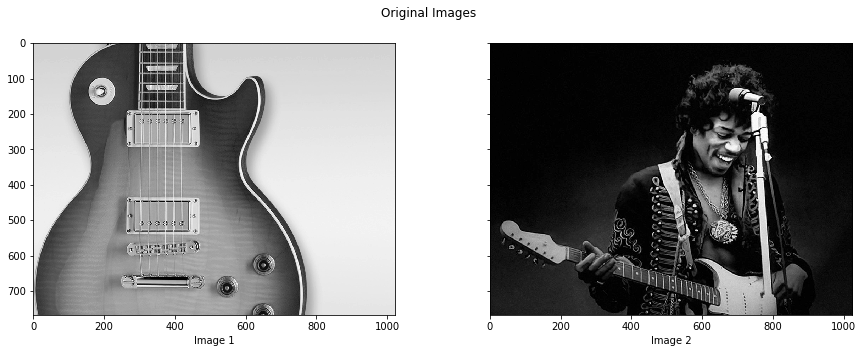

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15,5), sharey=True)
axs[0].imshow(image1_gs, cmap='gray')
axs[0].set_xlabel("Image 1")
axs[1].imshow(image2_gs,cmap='gray')
axs[1].set_xlabel("Image 2")
fig.suptitle('Original Images')

**8. Showing basic image algebra operations for grayscale images**

Text(0.5, 0.98, 'Image Algebra')

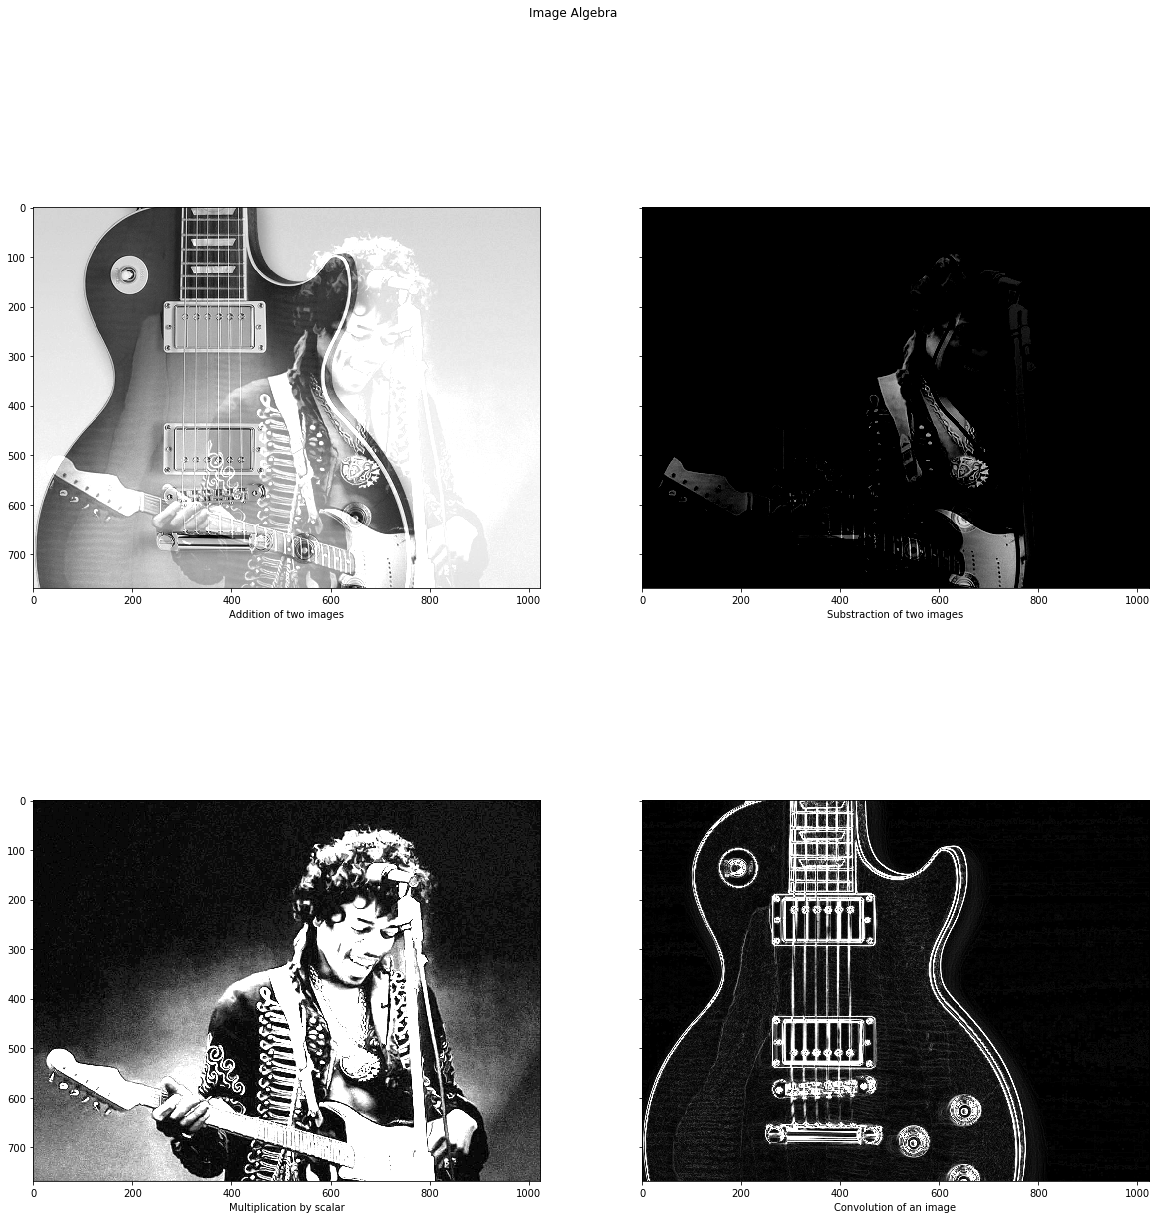

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(20,20), sharey=True)
axs[0,0].imshow(add_images, cmap='gray')
axs[0,0].set_xlabel("Addition of two images")
axs[0,1].imshow(sub_images,cmap='gray')
axs[0,1].set_xlabel("Substraction of two images")
axs[1,0].imshow(mul_image,cmap='gray')
axs[1,0].set_xlabel("Multiplication by scalar")
axs[1,1].imshow(conv_image,cmap='gray')
axs[1,1].set_xlabel("Convolution of an image")
fig.suptitle('Image Algebra')

**9. Showing original binary images**

Text(0.5, 0.98, 'Original Images')

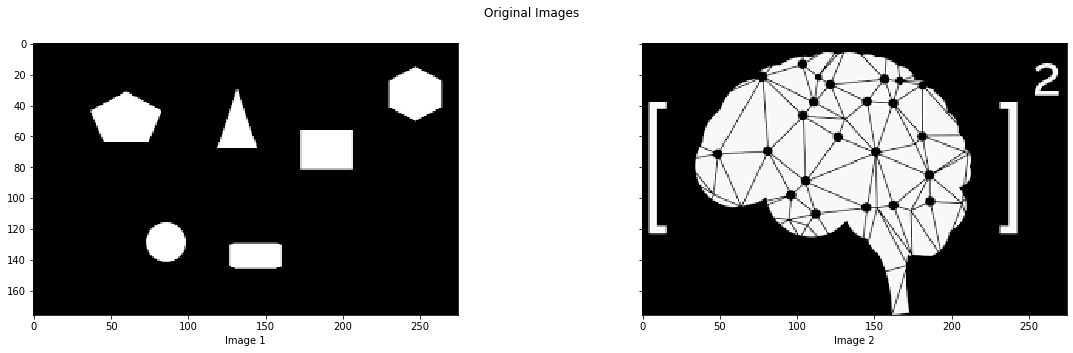

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(20,5), sharey=True)
axs[0].imshow(image1_binary, cmap='gray')
axs[0].set_xlabel("Image 1")
axs[1].imshow(image2_binary,cmap='gray')
axs[1].set_xlabel("Image 2")
fig.suptitle('Original Images')

**8. Showing basic image algebra operations for binary images**

Text(0.5, 0.98, 'Image Algebra')

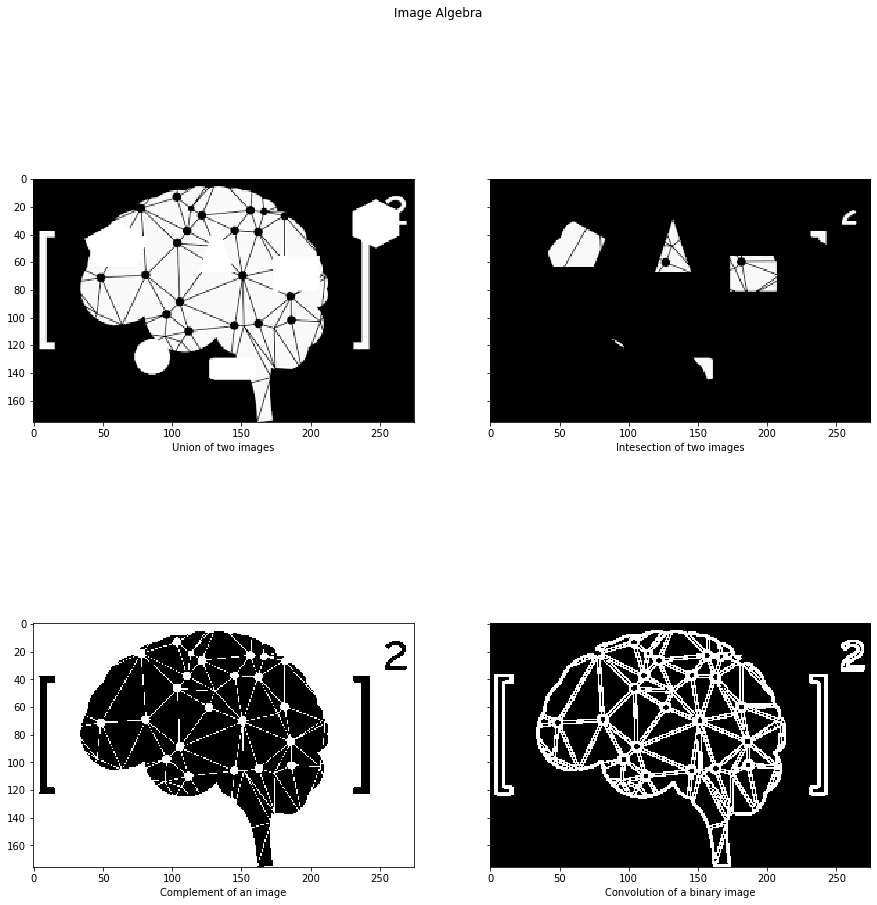

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(15,15), sharey=True)
axs[0,0].imshow(union_images, cmap='gray')
axs[0,0].set_xlabel("Union of two images")
axs[0,1].imshow(intersection_images,cmap='gray')
axs[0,1].set_xlabel("Intesection of two images")
axs[1,0].imshow(complement_image,cmap='gray')
axs[1,0].set_xlabel("Complement of an image")
axs[1,1].imshow(conv_binary_image,cmap='gray')
axs[1,1].set_xlabel("Convolution of a binary image")
fig.suptitle('Image Algebra')